In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.metrics import MeanSquaredError
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math

In [2]:
def merge_table(trait, data, traits_df):
    temp_data = data.copy()
    temp_traits = traits_df.copy()
    temp_data.insert(0, 'Response_ID', range(0, 0 + len(temp_data)))
    temp_traits.insert(0, 'Result_ID', range(0, 0 + len(temp_traits)))
    temp_traits = temp_traits[['Result_ID',trait]]
    reg_df = temp_data.merge(temp_traits, left_on='Response_ID', right_on='Result_ID')
    return reg_df

In [3]:
def correlated(trait, reg_df):
    corr = reg_df.corr()
    corr = corr[trait]
    high_relation_qs = []
    for i in range(len(corr)-1):
        if abs(corr[i]) > 0.4:
            high_relation_qs.append(corr.index[i])
    return high_relation_qs

In [4]:
def NN_model(inputs):
	# create model
	model = Sequential()

	model.add(Dense(inputs, input_dim=inputs, kernel_initializer='normal', activation='relu'))
	model.add(Dense(20, activation='relu'))
	model.add(Dense(15, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanSquaredError()])
	return model

In [5]:
def create_parameters(trait, high_relation_qs, data, traits_df):
    input_parameter = data[high_relation_qs].shape[1]
    X = data[high_relation_qs].to_numpy()
    y = traits_df[trait]
    return X, y, input_parameter

In [6]:
def plot_regression(y_test, y_predict):
    plt.figure(figsize=(16,16))
    plt.plot(range(100), y_test[:100], color="r", label="True "+ trait)
    plt.plot(range(100), y_predict[:100], color="b", label="Predicted "+ trait)
    plt.xlabel("Response Number")
    plt.ylabel(trait + " Value")
    plt.legend()

In [7]:
def bringing_it_together(trait):
    print("Trait: ", trait)

    data = pd.read_csv('questions.csv')
    traits_df = pd.read_csv('traits.csv')

    reg_df = merge_table(trait, data, traits_df)
    high_relation_qs = correlated(trait, reg_df)
    X, y, input_parameter = create_parameters(trait, high_relation_qs, data, traits_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    model = NN_model(input_parameter)
    history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=[X_test, y_test])
    y_predict = model.predict(X_test)
    print("The r-sqaured score:", r2_score(y_test, y_predict))
    plot_regression(y_test, y_predict)
    
    model.save(trait+".h5")
    return (trait, high_relation_qs)


In [8]:
traits = ["Openness", "Agreeableness", "Persistence", "Cooperativeness", "Openness to Experience", "Adjustment", "Ambition", "Learning Approach"]

Trait:  Openness
Epoch 1/100
43/43 [==============================] - 1s 8ms/step - loss: 4506.8052 - mean_squared_error: 4506.8052 - val_loss: 4420.8721 - val_mean_squared_error: 4420.8721
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 4070.0244 - mean_squared_error: 4070.0244 - val_loss: 3047.5767 - val_mean_squared_error: 3047.5767
Epoch 3/100
43/43 [==============================] - ETA: 0s - loss: 1317.2706 - mean_squared_error: 1317.27 - 0s 2ms/step - loss: 1289.5710 - mean_squared_error: 1289.5710 - val_loss: 332.9145 - val_mean_squared_error: 332.9145
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 278.7621 - mean_squared_error: 278.7621 - val_loss: 238.2792 - val_mean_squared_error: 238.2792
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 223.5779 - mean_squared_error: 223.5779 - val_loss: 198.2586 - val_mean_squared_error: 198.2586
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - los

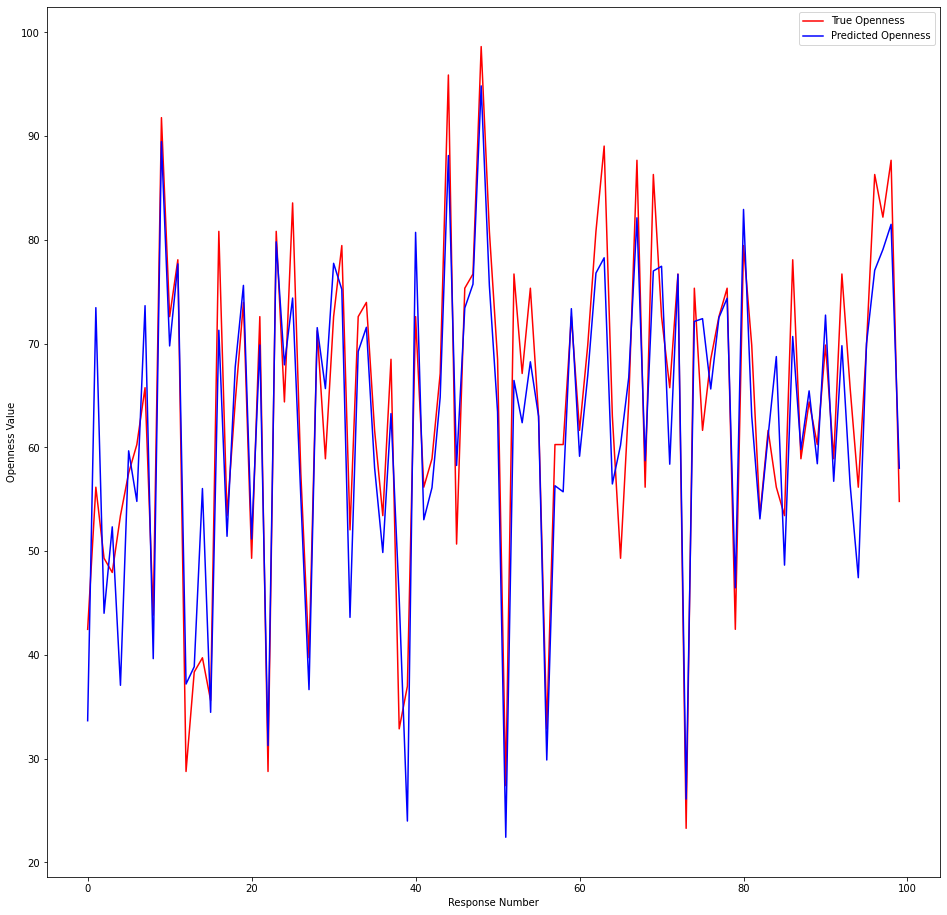

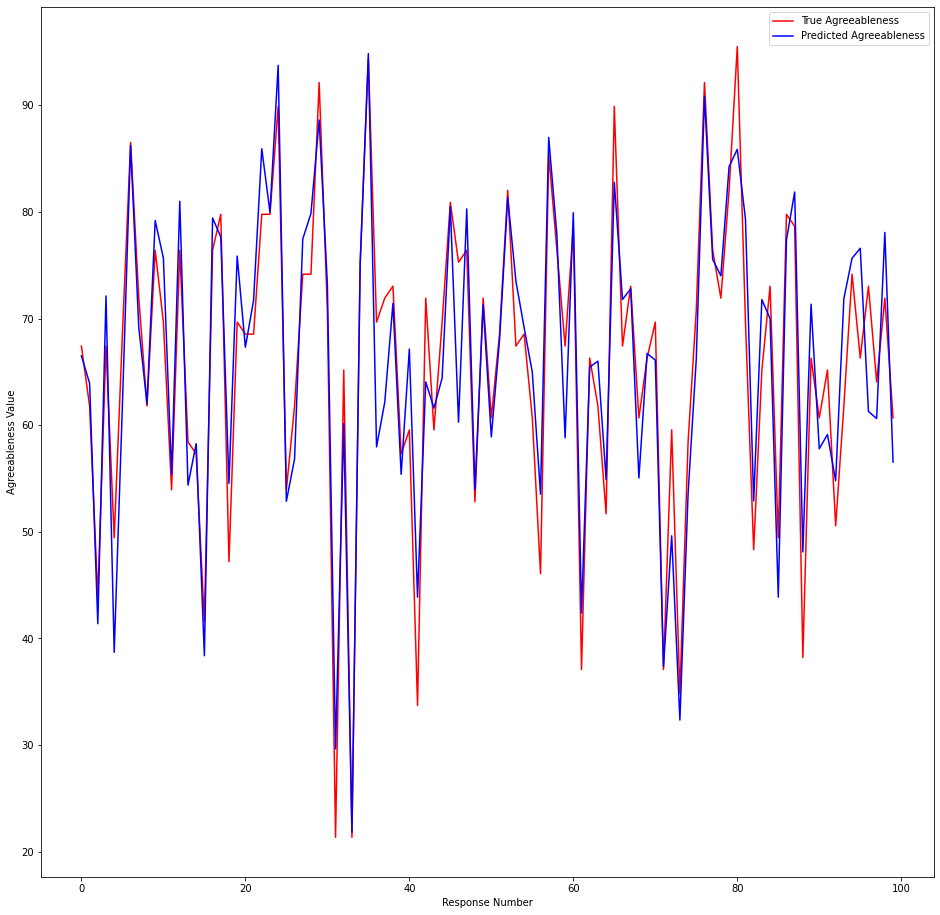

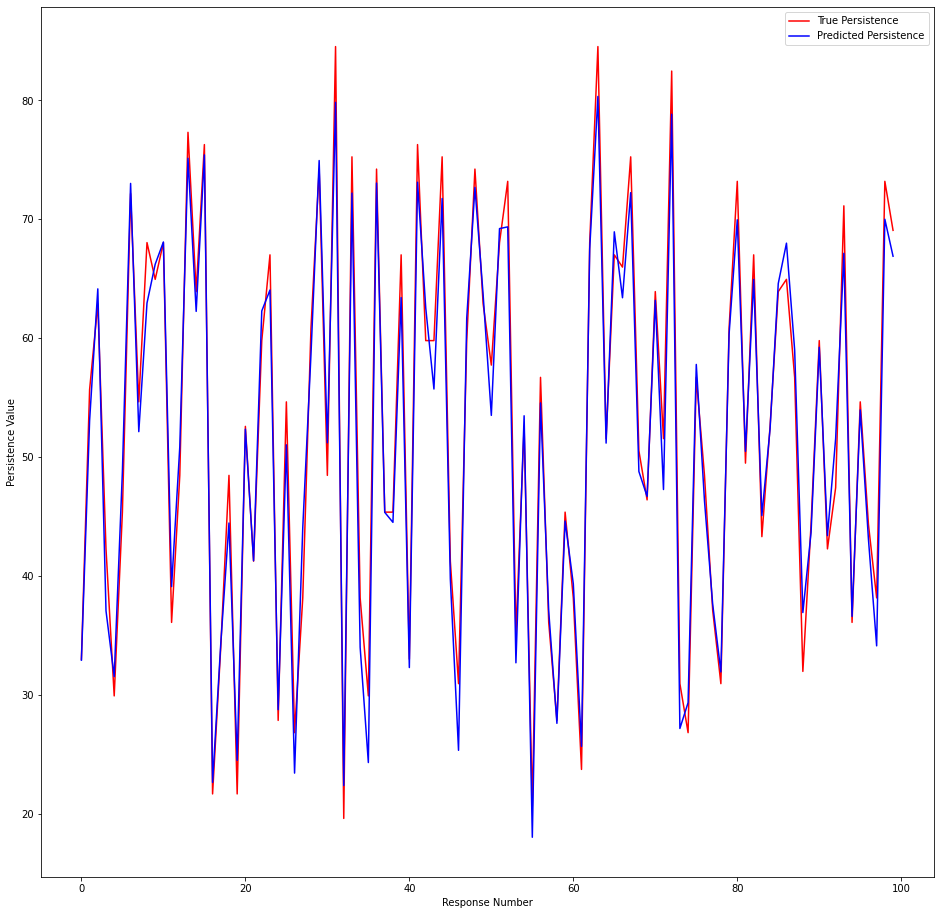

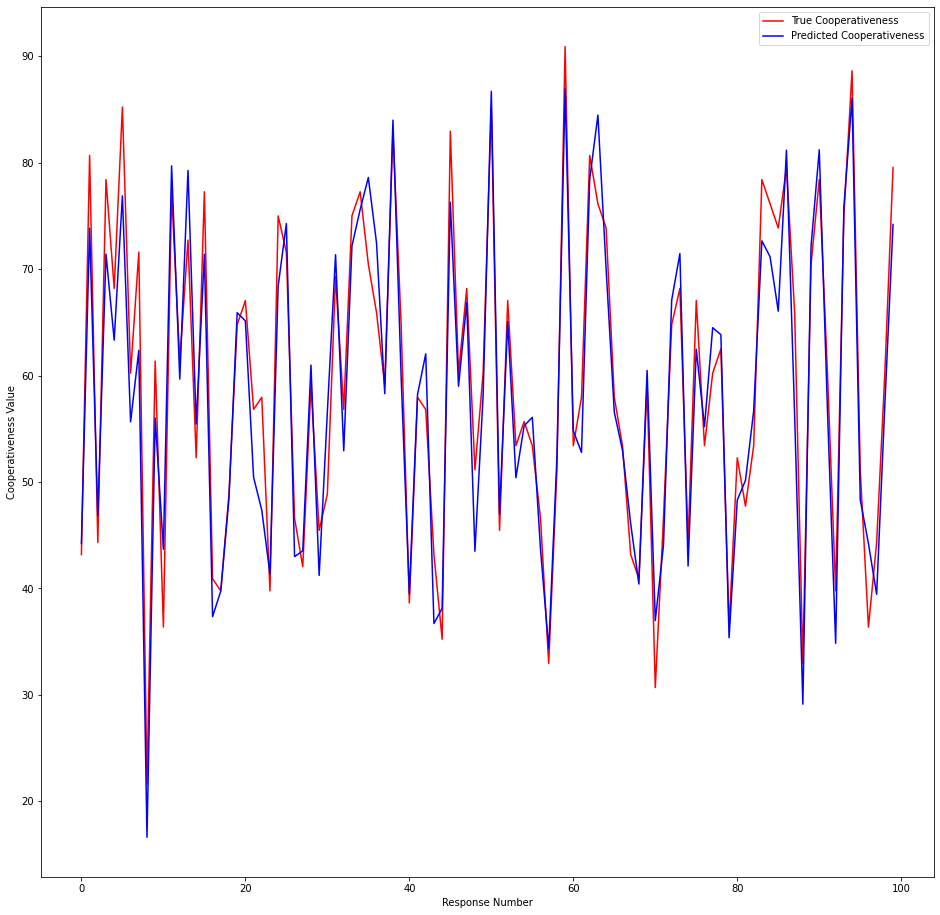

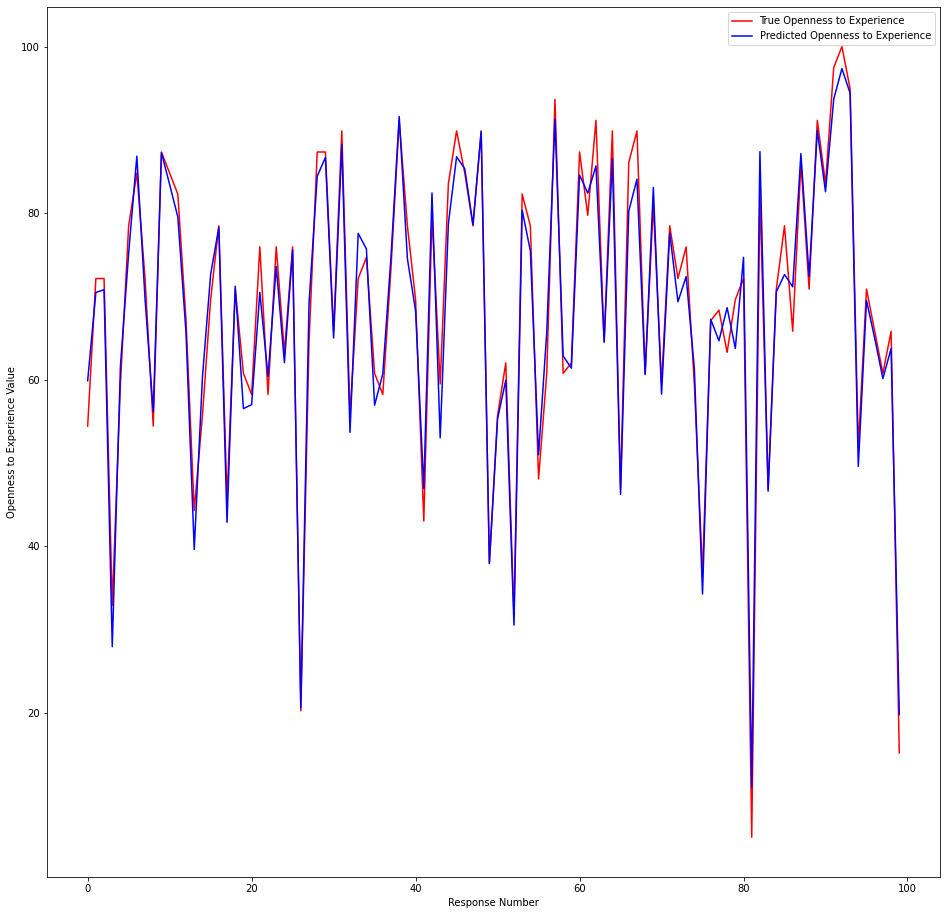

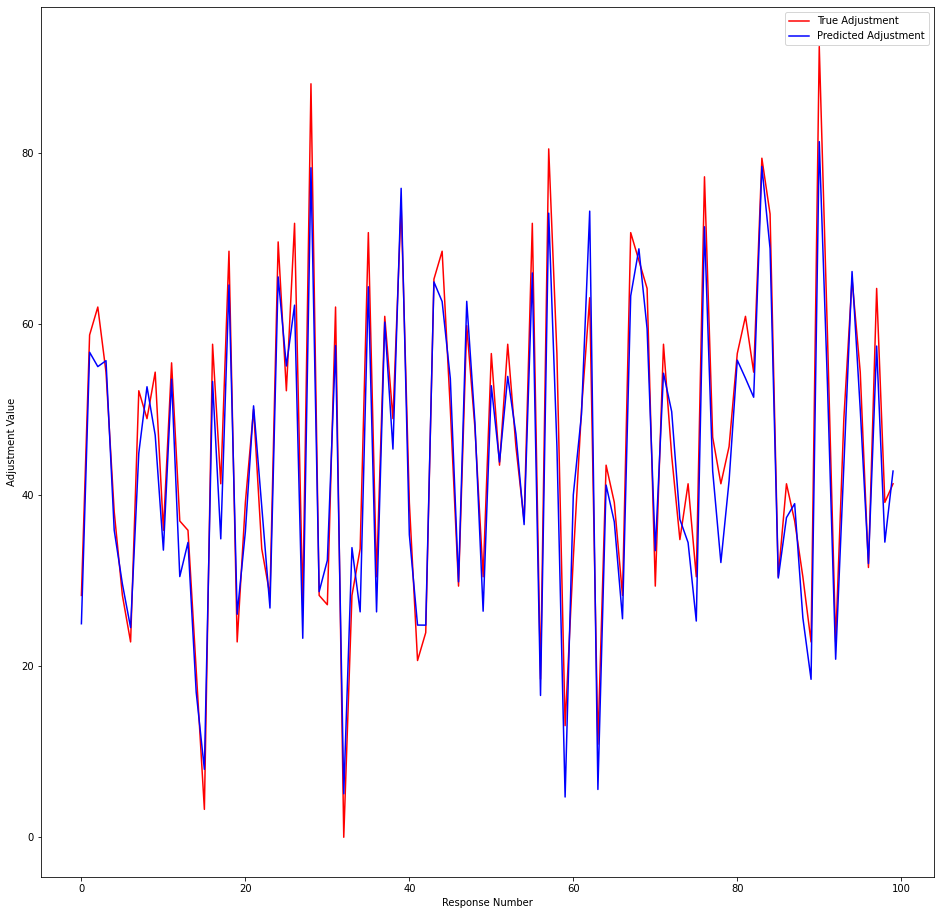

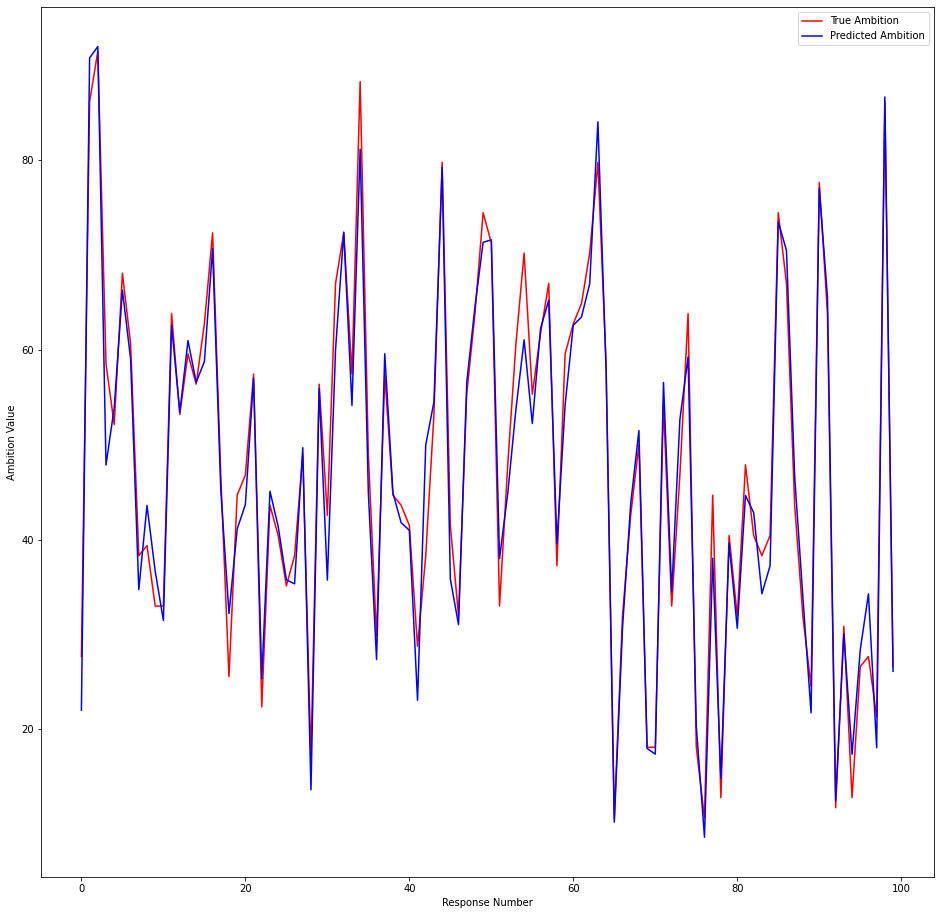

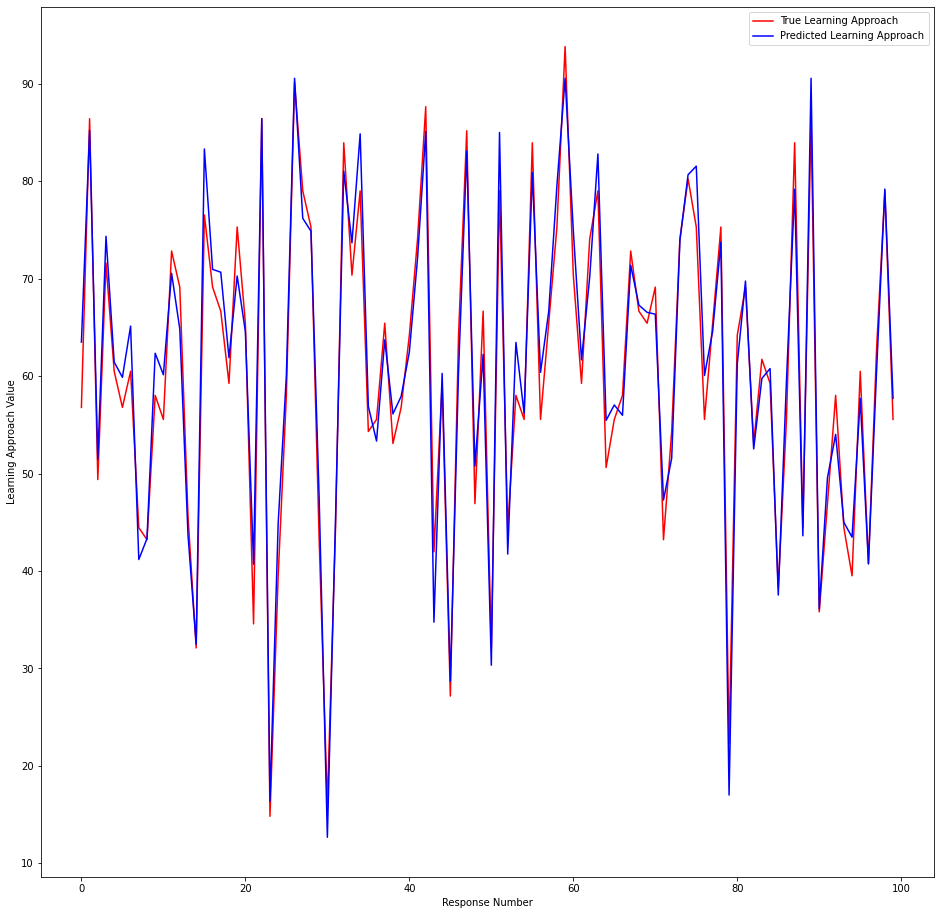

In [9]:
questions_dict = {}
for trait in traits:
    t, q = bringing_it_together(trait)
    questions_dict[t] = q

In [10]:
print(questions_dict)

{'Openness': ['Q7A', 'Q19A', 'Q26A', 'Q27A', 'Q59A', 'Q75A', 'Q76A', 'Q84A', 'Q94A', 'Q100A', 'Q115A', 'Q138A', 'Q139A', 'Q150A', 'Q153A', 'Q161A'], 'Agreeableness': ['Q8A', 'Q9A', 'Q11A', 'Q12A', 'Q16A', 'Q19A', 'Q23A', 'Q24A', 'Q32A', 'Q34A', 'Q40A', 'Q46A', 'Q50A', 'Q51A', 'Q52A', 'Q62A', 'Q65A', 'Q77A', 'Q80A', 'Q86A', 'Q87A', 'Q97A', 'Q104A', 'Q111A', 'Q118A', 'Q119A', 'Q123A', 'Q129A', 'Q130A', 'Q172A', 'Q181A'], 'Persistence': ['Q4A', 'Q5A', 'Q13A', 'Q14A', 'Q22A', 'Q25A', 'Q31A', 'Q48A', 'Q81A', 'Q101A', 'Q110A', 'Q116A', 'Q137A', 'Q141A', 'Q144A', 'Q145A', 'Q152A', 'Q167A'], 'Cooperativeness': ['Q6A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q19A', 'Q23A', 'Q24A', 'Q34A', 'Q40A', 'Q50A', 'Q51A', 'Q52A', 'Q62A', 'Q65A', 'Q77A', 'Q80A', 'Q85A', 'Q97A', 'Q111A', 'Q114A', 'Q117A', 'Q123A', 'Q166A', 'Q172A'], 'Openness to Experience': ['Q7A', 'Q26A', 'Q27A', 'Q28A', 'Q43A', 'Q68A', 'Q75A', 'Q83A', 'Q84A', 'Q94A', 'Q100A', 'Q115A', 'Q138A', 'Q139A', 'Q154A', 'Q161A'], 'Adjustment': ['